In [1]:
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
from skimage import color
import math as math
import cv2


# First Exercise

## Loading and displaying image

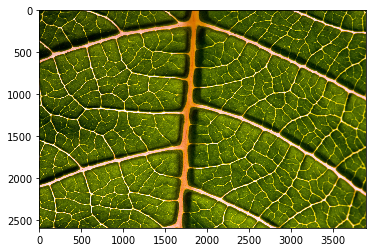

In [2]:
image=plt.imread('images/leaf.jpg')
plt.imshow(image)

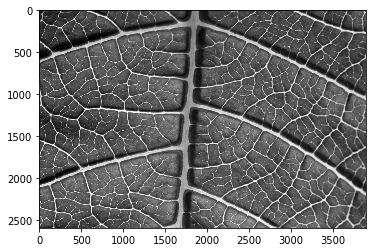

In [3]:
grayImage=color.rgb2gray(image)
plt.imshow(grayImage,'gray')

## Fourier Transform using Numpy FFT

(2592, 3888)


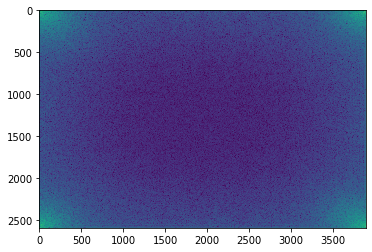

In [4]:
fourier=np.fft.fft2(grayImage)
print(fourier.shape)
plt.imshow(np.log(1+np.absolute(fourier)))

## Custom Fourier Transform

In [5]:
def fft(length_x,width_y,v,y,image,inner=True):
    expVector=np.exp(-2j*np.pi/width_y*(v@y)) if inner else np.exp(-2j*np.pi/length_x*(v@y))
    if inner:
        return image @ expVector
    else:
        return expVector @ image

In [6]:
def fft2d(grayImage):
    length_x = grayImage.shape[0] 
    width_y= grayImage.shape[1]

    y=np.arange(width_y).reshape(1,-1)
    v = np.arange(width_y).reshape(-1,1)

    firstLevel=fft(length_x,width_y,v,y,grayImage,True)

    u = np.arange(length_x).reshape(-1,1)
    x = np.arange(length_x).reshape(1,-1)

    return fft(length_x,width_y,u,x,firstLevel,False)

In [7]:
fourierimage=fft2d(grayImage)

(<matplotlib.image.AxesImage at 0x20c10b2a5c8>, Text(0.5, 1.0, 'Angle'))

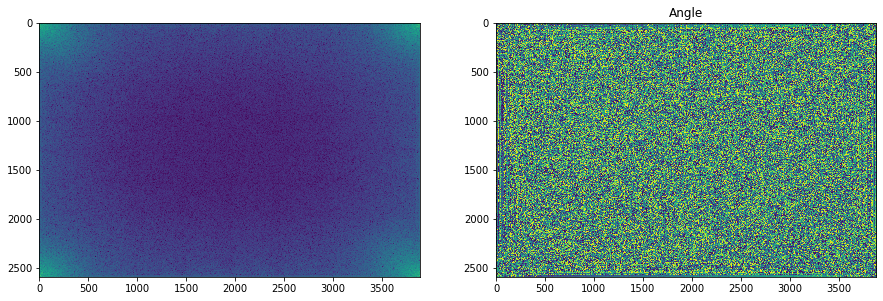

In [8]:
f,axxr = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
axxr[0].imshow(np.log(np.abs(fourierimage)+1)),plt.title('Magnitude')
axxr[1].imshow(np.angle(fourierimage)),plt.title('Angle')
## angle is calculated and shown just for experminental purposes, I know it's not a part of homework. 

## Check my fourier transform with numpy result

In [9]:
np.all(np.isclose(fourierimage,fourier))

True

### Load and Save in practical_1

In [10]:
leaf=color.rgb2gray(plt.imread('images/leaf.jpg'))
fourierLeaf=fft2d(leaf)
plt.imsave('Practical_1/Leaf_Magnitude.jpg',np.log(1+np.abs(fourierLeaf)))
plt.imsave('Practical_1/Leaf_Angle.jpg',np.angle(fourierLeaf))

In [11]:
leaf=color.rgb2gray(plt.imread('images/scene.jpg'))
fourierLeaf=fft2d(leaf)
plt.imsave('Practical_1/scene_Magnitude.jpg',np.log(1+np.abs(fourierLeaf)))
plt.imsave('Practical_1/scene_Angle.jpg',np.angle(fourierLeaf))

## C

به نظر می اید بهتر است از فیلتر پایین گذر استفاده کنیم که فرکانس های بالا حذف شوند

# Second Exercise

In [12]:
def rgb2gray(image):
    return 0.2989 * image[:,:,0] + 0.5870 * image[:,:,1] + 0.1140 * image[:,:,2] # r*0.29 + g*0.58 + b*0.11

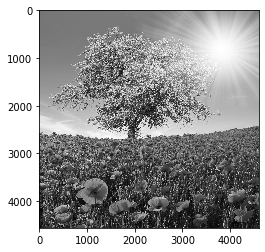

In [13]:
plt.imshow(rgb2gray(plt.imread('images/scene.jpg')),'gray')

In [19]:
def convolve(image,kernel):
    kernel = np.fliplr(np.flipud(kernel))
    x_kernel = kernel.shape[0]
    y_kernel = kernel.shape[1]
    
    finalimage = np.zeros(shape=(image.shape[0]-kernel.shape[0]+1,image.shape[1]-kernel.shape[1]+1))
    for i in range(image.shape[0]-x_kernel):
        for j in range(image.shape[1]- y_kernel):
            finalimage[i,j] = np.sum(image[i:i+x_kernel,j:j+y_kernel]*kernel)
    return finalimage

In [43]:
def sobel_filter(image):
    verticalkernel = np.array([[-1, 0,1],
                  [-2,0,2],
                  [-1,0,1]])
    horizontalKernel = np.array([[1,2,1],
                             [0,0,0],
                             [-1,-2,-1]])
    verticalGradient=convolve(image,verticalkernel)
    horizontalGradient=convolve(image,horizontalKernel)
    sobel_filter = np.sqrt(np.square(verticalGradient) + np.square(horizontalGradient))
    return (verticalGradient,horizontalGradient,sobel_filter)

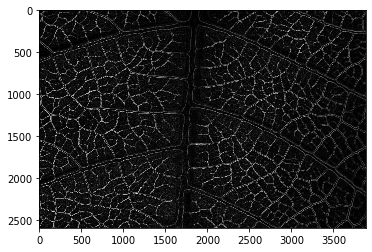

In [45]:
leaf = color.rgb2gray(plt.imread('images/leaf.jpg'))
vertical,horizontal,sobel =sobel_filter(leaf)
plt.imshow(sobel,'gray')

# Result of Sobel Filter with library

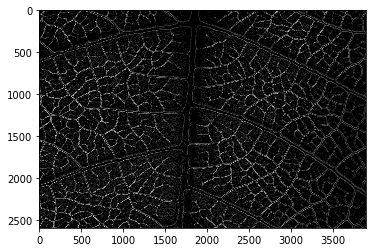

In [46]:
def sobel_filter_opencv(image):
    sobel_horizontal = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_vertical = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    absx= cv2.convertScaleAbs(sobel_horizontal)
    absy = cv2.convertScaleAbs(sobel_vertical)
    edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)
    return edge
plt.imshow(sobel_filter_opencv(leaf),'gray')

# Saving the result into the folder

In [49]:
leaf = color.rgb2gray(plt.imread('images/leaf.jpg'))
vertical,horizontal,sobel =sobel_filter(leaf)
plt.imsave('Practical_2/leaf_verticalEdge.jpg',vertical)
plt.imsave('Practical_2/leaf_HorizontalEdge.jpg',horizontal)
plt.imsave('Practical_2/leaf_Sobel.jpg',sobel)
plt.imsave('Practical_2/leaf_Sobel_OpenCV.jpg',sobel_filter_opencv(leaf))